# Azted G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.1
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 1000, 36, 1, 13)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (1000, 36, 1, 13)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: single_proc_exec
Execution Mode: single_threaded


Flattening results:   0%|          | 0/7001 [00:00<?, ?it/s]

Total execution time: 19.35s


In [3]:
sim_df.to_csv("march4_test_data.csv")

<Axes: xlabel='timestep', ylabel='time_l1'>

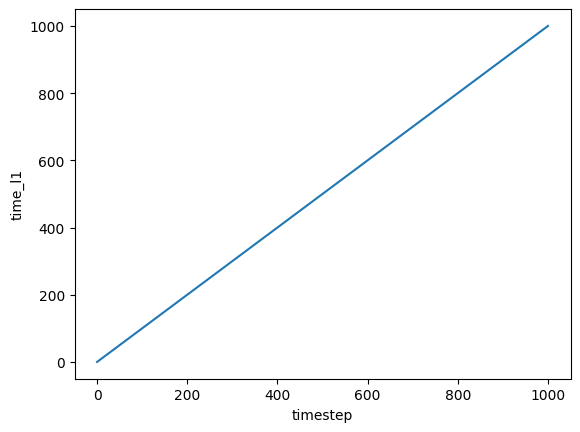

In [4]:
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

In [5]:
sim_df.head(4)

,time_l1,delta_l1_blocks,advance_l1_blocks,agents,current_process,transactions,gas_fee_l1,gas_fee_blob,finalized_blocks_count,cumm_block_rewards,cumm_fee_cashback,cumm_burn,token_supply,simulation,subset,run,timestep,delta_blocks
0,0,0,0,{b5168296-7c25-4f84-bd88-f92377b00d2a: Agent(u...,None,{},50.0,7.0,0,200.0,50.0,50,"TokenSupply(circulating=154.81197384235475, st...",0,0,1,0,NaN
7,1,0,0,{b5168296-7c25-4f84-bd88-f92377b00d2a: Agent(u...,Process(uuid=UUID('fcee2310-4beb-447b-9cb2-cea...,{},6.0,1.0,0,200.0,50.0,50,"TokenSupply(circulating=154.81197384235475, st...",0,0,1,1,0.0
14,2,0,0,{b5168296-7c25-4f84-bd88-f92377b00d2a: Agent(u...,Process(uuid=UUID('fcee2310-4beb-447b-9cb2-cea...,{},36.0,1.0,0,200.0,50.0,50,"TokenSupply(circulating=154.81197384235475, st...",0,0,1,2,0.0
21,3,0,0,{b5168296-7c25-4f84-bd88-f92377b00d2a: Agent(u...,Process(uuid=UUID('fcee2310-4beb-447b-9cb2-cea...,{23237071-259f-4ff8-84bd-1521a3892d87: Proposa...,1.0,1.0,0,200.0,50.0,50,"TokenSupply(circulating=154.81197384235475, st...",0,0,1,3,0.0


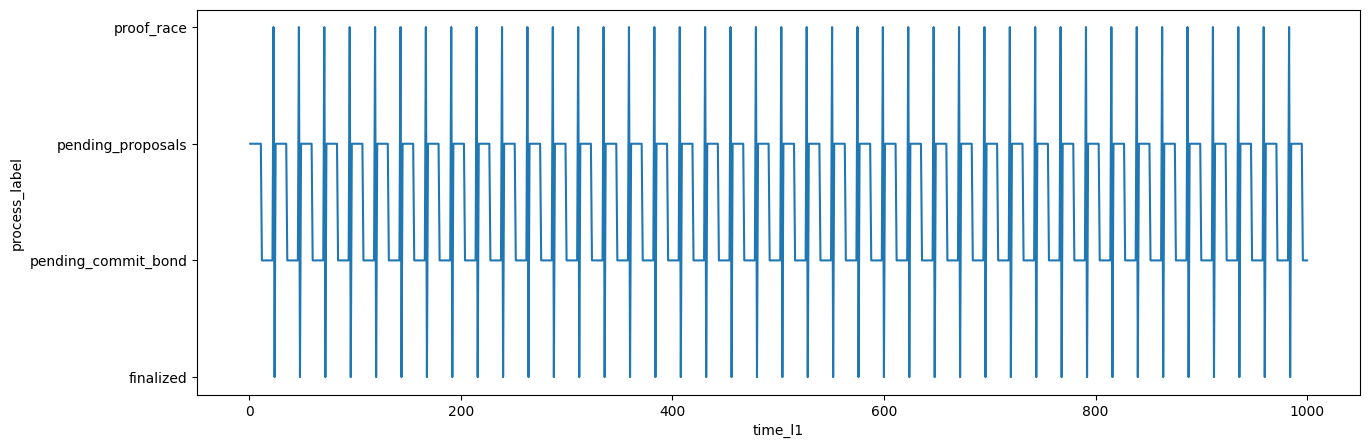

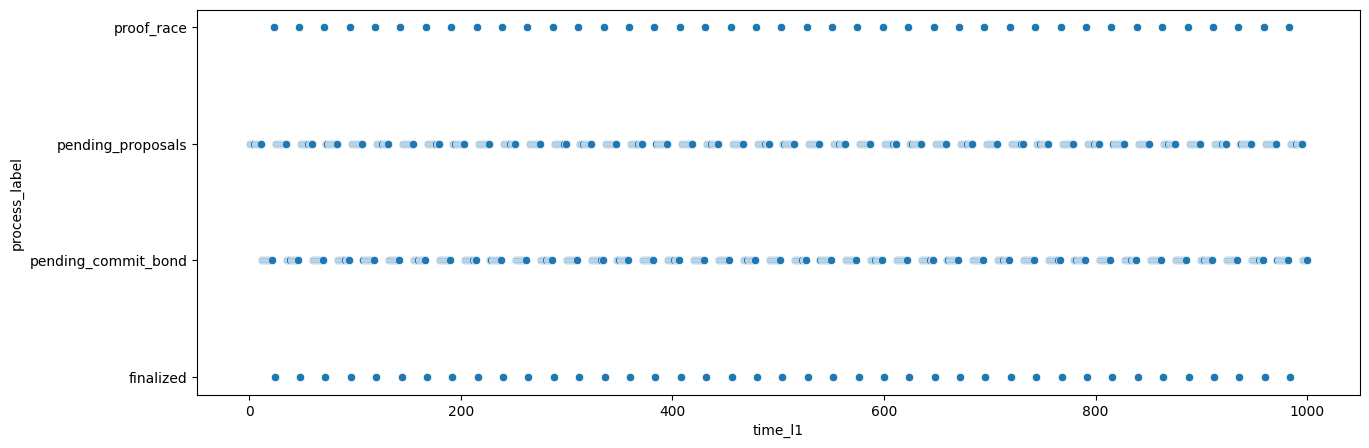

In [6]:
fig_df = sim_df.copy()
fig_df['process_order'] = fig_df.current_process.map(lambda x: x.phase.value if x is not None else None)
fig_df['process_label'] = fig_df.current_process.map(lambda x: x.phase.name if x is not None else None)
fig_df = fig_df.sort_values(['process_order', 'timestep'])#.query("time_l1 > 320 & time_l1 < 370")


plt.figure(figsize=(15, 5))
sns.lineplot(x=fig_df.time_l1, 
             y=fig_df.process_label)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=fig_df.time_l1, 
             y=fig_df.process_label)
plt.show()

In [7]:
fig_df.set_index('time_l1').sort_index().process_label

time_l1
0                      None
1         pending_proposals
2         pending_proposals
3         pending_proposals
4         pending_proposals
               ...         
996     pending_commit_bond
997     pending_commit_bond
998     pending_commit_bond
999     pending_commit_bond
1000    pending_commit_bond
Name: process_label, Length: 1001, dtype: object

In [8]:
sim_df.iloc[-1]

time_l1                                                                1000
delta_l1_blocks                                                           0
advance_l1_blocks                                                         0
agents                    {b5168296-7c25-4f84-bd88-f92377b00d2a: Agent(u...
current_process           Process(uuid=UUID('ccfaffb0-5bfc-40dd-98ce-713...
transactions              {23237071-259f-4ff8-84bd-1521a3892d87: Proposa...
gas_fee_l1                                                              1.0
gas_fee_blob                                                            1.0
finalized_blocks_count                                                   41
cumm_block_rewards                                                    241.0
cumm_fee_cashback                                                 51.735818
cumm_burn                                                                50
token_supply              TokenSupply(circulating=279.54779184235474, st...
simulation  

<Axes: xlabel='time_l1', ylabel='finalized_blocks_count'>

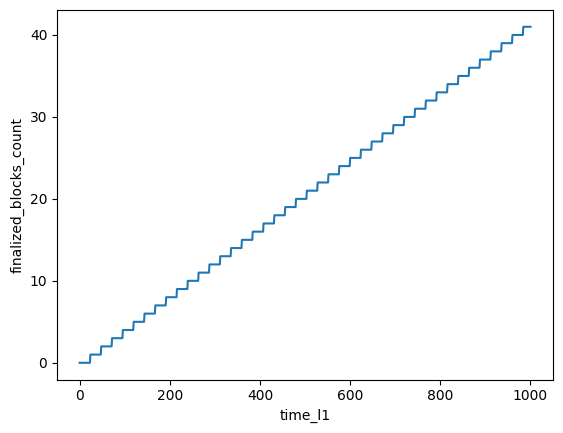

In [9]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)

<Axes: xlabel='time_l1', ylabel='cumm_block_rewards'>

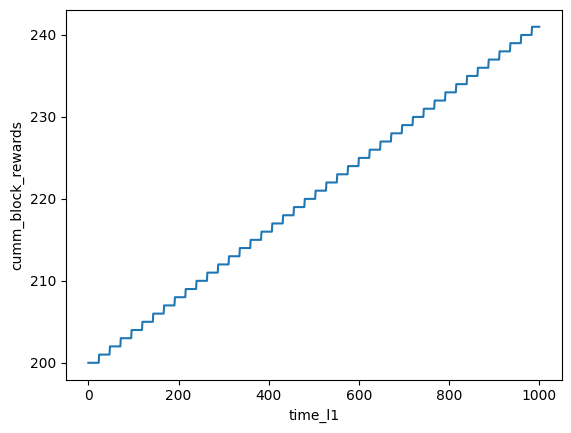

In [10]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

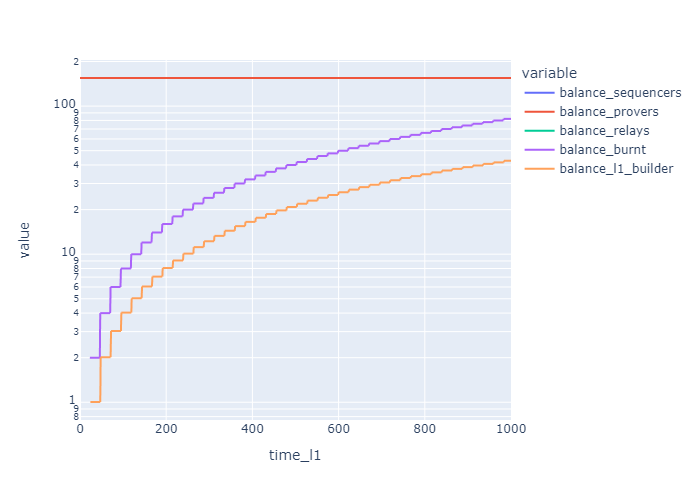

In [11]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


px.line(sim_df,
        x='time_l1',
        y=['balance_sequencers', 
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        log_y=True)

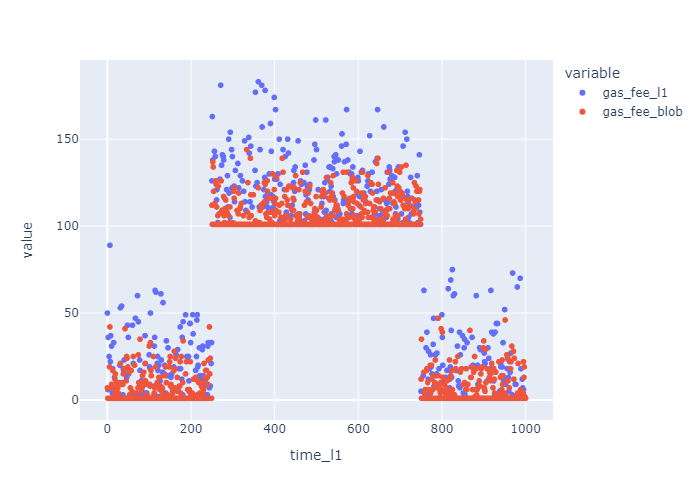

In [12]:
px.scatter(sim_df,
        x='time_l1',
        y=['gas_fee_l1', 'gas_fee_blob'])

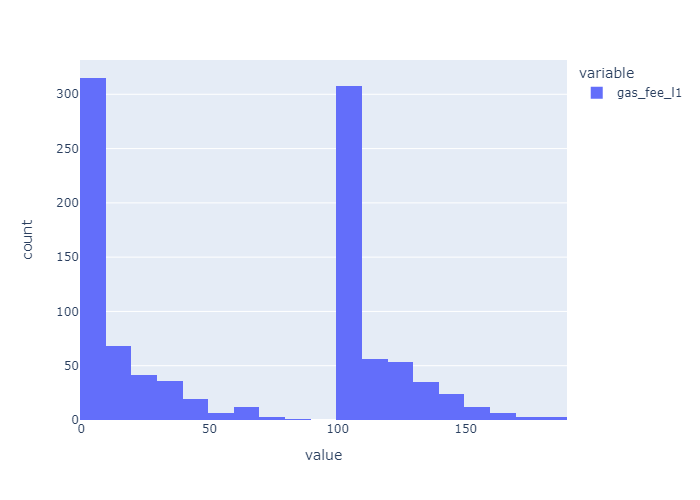

In [13]:
px.histogram(sim_df,
        x=['gas_fee_l1'])

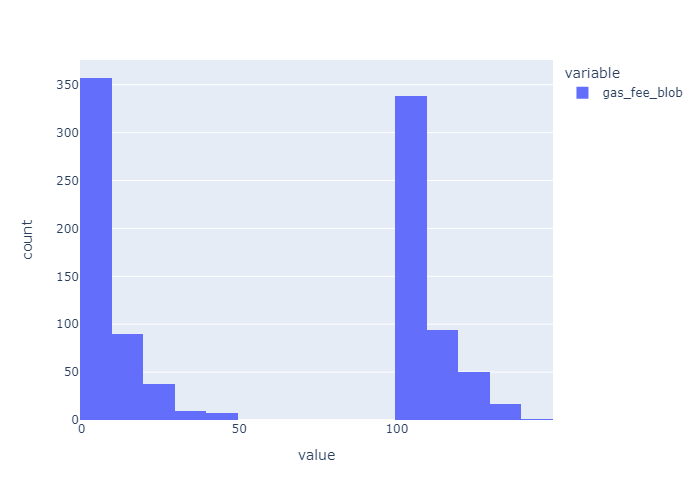

In [14]:
px.histogram(sim_df,
        x=['gas_fee_blob'])

In [15]:
sim_df.gas_fee_l1.min()

1.0